# Portfolio Optimization & Risk Management
## Notebook 01 — Data Collection & Preprocessing

In this notebook, we will:
1. Import required libraries.
2. Download historical stock price data (S&P 500 subset).
3. Compute daily returns and annualized statistics.
4. Prepare the covariance matrix for use in portfolio optimization.

In [12]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display & plotting options
pd.set_option("display.float_format", "{:.4f}".format)
sns.set(style="whitegrid")

### 📌 Step 1: Select Assets (Trending in 2025)

We will use **trending stocks in 2025**, focusing on AI, tech, and innovation leaders:
- Tesla (TSLA) → EVs and robotics
- Amazon (AMZN) → e-commerce and AWS
- Microsoft (MSFT) → AI/ChatGPT
- NVIDIA (NVDA) → GPUs and AI
- Alphabet (GOOGL) → Google Cloud + AI
- Meta (META) → AI and metaverse
- Apple (AAPL) → Consumer tech and AI integration


In [13]:
def get_adj_close(tickers, start="2019-01-01", end="2025-01-01"):
    data = yf.download(tickers, start=start, end=end)

    # Case 1: MultiIndex DataFrame
    if isinstance(data.columns, pd.MultiIndex):
        if "Adj Close" in data.columns.levels[0]:
            return data.xs("Adj Close", axis=1, level=0)
        else:
            return data.xs("Close", axis=1, level=0)

    # Case 2: Single Index DataFrame
    else:
        if "Adj Close" in data.columns:
            return data["Adj Close"]
        else:
            return data["Close"]

# Example usage
tickers = ["TSLA", "AMZN", "MSFT", "NVDA", "GOOGL", "META", "AAPL"]
adj_close = get_adj_close(tickers)
print(adj_close.head())


[*********************100%***********************]  7 of 7 completed

Ticker        AAPL    AMZN   GOOGL     META    MSFT   NVDA    TSLA
Date                                                              
2019-01-02 37.5752 76.9565 52.3728 134.9397 94.7897 3.3774 20.6747
2019-01-03 33.8324 75.0140 50.9223 131.0212 91.3026 3.1733 20.0240
2019-01-04 35.2767 78.7695 53.5343 137.1973 95.5490 3.3766 21.1793
2019-01-07 35.1982 81.4755 53.4275 137.2968 95.6709 3.5554 22.3307
2019-01-08 35.8692 82.8290 53.8968 141.7523 96.3645 3.4669 22.3567


## Exploratory Data Analysis (EDA)

Before portfolio optimization, we will:
- Visualize stock price trends (time series).
- Look at cumulative returns.
- Compare volatility vs. return.
- Explore correlations between assets.


<Figure size 1200x800 with 0 Axes>

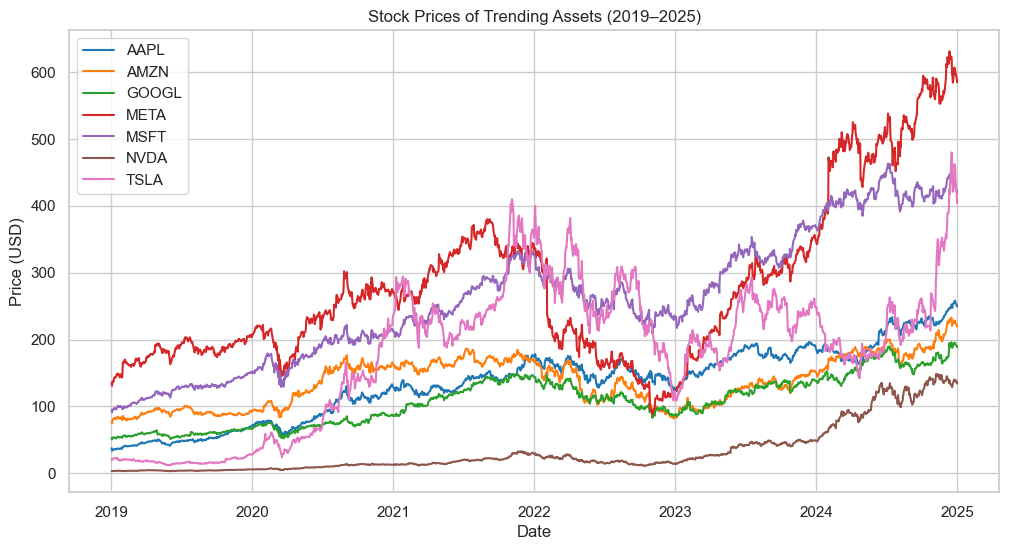

In [16]:
plt.figure(figsize=(12, 8))
# Pick a clear color palette
colors = sns.color_palette("tab10", n_colors=len(adj_close.columns))

plt.figure(figsize=(12,6))
for i, ticker in enumerate(adj_close.columns):
    plt.plot(adj_close.index, adj_close[ticker], label=ticker, color=colors[i])

plt.title("Stock Prices of Trending Assets (2019–2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

## Interpretation of the stock pricing plot

- All assets show upward long-term growth from 2019–2025.
- However, growth is uneven across companies — some like META and MICROSOFT skyrocketed, while AAPL and AMZN grew more steadily.
- NVDA (NVIDIA): Huge growth by 2025, driven by the AI/ChatGPT boom and GPU demand.
- TSLA (Tesla): Very volatile but saw strong rallies, especially around 2020–2021 and again in 2024.

👉 These are high-risk, high-return assets.
- AAPL (Apple) and MSFT (Microsoft): Strong but steady growth. Less volatile than NVDA/TSLA, making them core stable assets.
- AMZN (Amazon): Good growth but faced plateaus after 2021, possibly from slowing e-commerce growth and AWS competition.

👉 These are medium-risk, stable-return assets.
META (Facebook → Meta): Large dip in 2022 (metaverse pivot & ad revenue issues), but strong recovery by 2024.
GOOGL (Alphabet): Moderate growth but with some fluctuations tied to regulatory pressures and AI competition.

👉 These are cyclical/volatile bets.
- 2020 COVID-19 crash: Sharp dip across all stocks early in 2020.
- 2022 Tech Sell-off: Noticeable downturn in TSLA, META, AMZN.
- 2023–2024 AI boom: NVDA and MSFT surge strongly, dragging the sector higher.

📌 Key Takeaways for Portfolio Strategy
- Diversification is critical: NVDA and TSLA offer growth but come with high volatility → balance with AAPL, MSFT.
- Defensive positioning: AMZN and GOOGL are less explosive but offer long-term stability.
- META adds cyclical risk but could provide upside in recovery phases.

## Cumulative Returns of Trending Assets (2019–2025)

This chart shows the **growth of $1 invested in each stock at the start of 2019** up to 2025.

- **How to read it**:
  - Each line represents one stock.
  - If the line reaches 5.0 on the Y-axis, it means $1 grew into $5 (a 400% return).
  - If the line drops below 1.0, the investment lost value compared to the starting point.



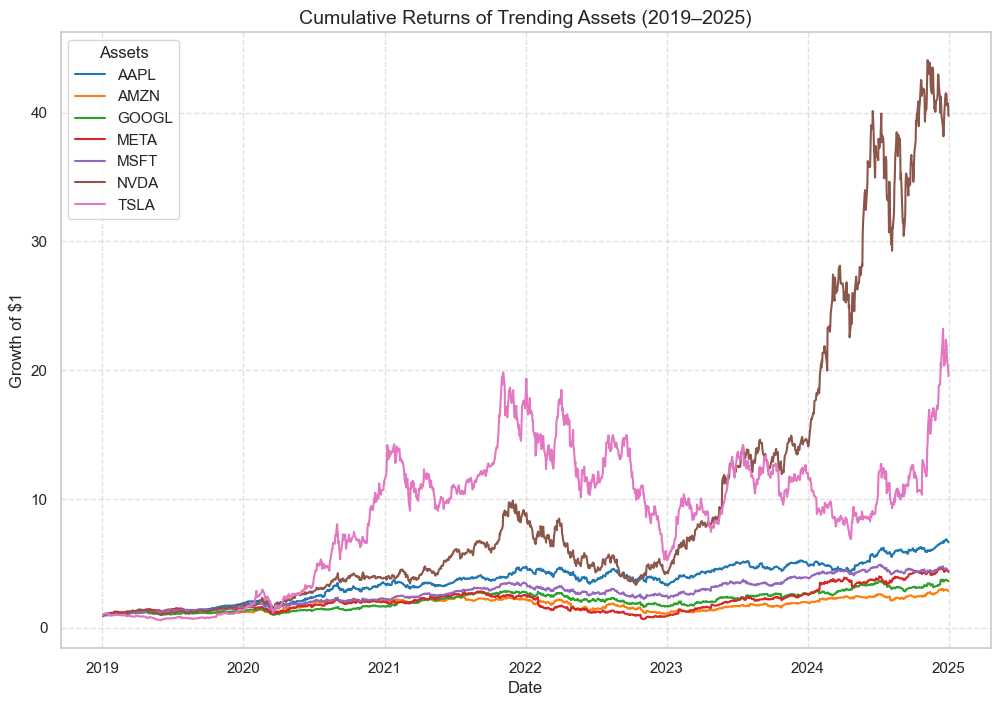

In [20]:
# calculate daily returns
returns = adj_close.pct_change().dropna()
cum_returns = (1+returns).cumprod()

# Pick a clear color palette
colors = sns.color_palette("tab10", n_colors=len(adj_close.columns))
plt.figure(figsize=(12, 8))
for i, ticker in enumerate(cum_returns.columns):
    plt.plot(cum_returns.index, cum_returns[ticker], label=ticker, color=colors[i])

plt.title("Cumulative Returns of Trending Assets (2019–2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Growth of $1", fontsize=12)
plt.legend(title="Assets")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Interpretation of Cumulative Returns Across Assets

- NVDA (NVIDIA) is the top performer, but with steep drawdowns in between. $1 grew into $40+ by 2025.
- TSLA (TESLA) holds the second place, dollar 1 grew into ~40+ by 2025. But very volatile (huge spikes and crashes). It offers high return and high risk.
- AAPL (Apple) and MSFT (Microsoft) steadily compounded, turning dollar 1 into ~5–7 by 2025. Much smoother than NVDA/ TSLA and offers medium return and lower-volatility assets.
- AMZN (Amazon) and GOOGL (Alphabet) grew modestly — ~dollar 1 → 3–4. Stable businesses, less explosive growth → good defensive positioning.
- META (Facebook/Meta) → dropped heavily in 2022, then rebounded strongly in 2024.

📌 Portfolio Implications

- If you only chased NVDA/TSLA → huge rewards, but also painful drawdowns.
- If you only held AAPL/MSFT → smaller but smoother growth.
- Combining them → diversification: capture upside, reduce shocks.
- Adding AMZN/GOOGL → defensive stability.
- META adds cyclicality but could boost returns in rebounds.

## Risk vs. Return Analysis
Let's see
- Which stocks gave the highest annualized return.
- Which had the highest volatility (risk).
- How they compare in terms of risk-adjusted return (Sharpe ratio).

        Annual Return  Volatility  Sharpe Ratio
Ticker                                         
TSLA           0.7039      0.6448        1.0296
NVDA           0.7493      0.5189        1.3670
META           0.3363      0.4251        0.6970
AMZN           0.2332      0.3413        0.5661
GOOGL          0.2628      0.3121        0.7140
AAPL           0.3639      0.3084        1.0503
MSFT           0.2905      0.2900        0.8637


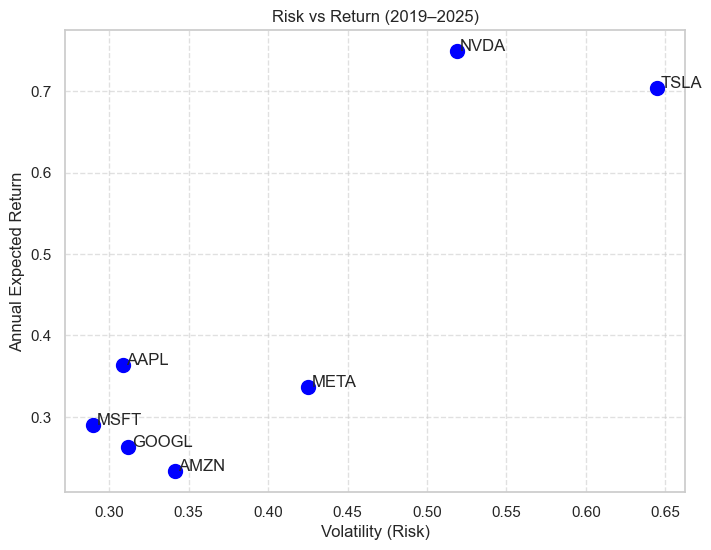

In [21]:


# Annualized expected returns & volatility
annual_returns = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)

# Assume risk-free rate (US 10Y ~ 4%)
risk_free_rate = 0.04
sharpe_ratios = (annual_returns - risk_free_rate) / annual_volatility

# Combine into a summary DataFrame
summary = pd.DataFrame({
    "Annual Return": annual_returns,
    "Volatility": annual_volatility,
    "Sharpe Ratio": sharpe_ratios
}).sort_values(by="Volatility", ascending=False)

print(summary)

# Scatterplot of Risk vs Return
plt.figure(figsize=(8,6))
plt.scatter(annual_volatility, annual_returns, c="blue", s=100)

for i, ticker in enumerate(annual_returns.index):
    plt.text(annual_volatility[i]+0.002, annual_returns[i], ticker)

plt.title("Risk vs Return (2019–2025)")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Annual Expected Return")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


- **Annualized Return**: average yearly return from 2019–2025.
- **Volatility**: standard deviation of returns (measure of risk).
- **Sharpe Ratio**: return per unit of risk, adjusted for a 4% risk-free rate.

### Key Insights:
- **Top-right (High Return, High Risk)** → NVDA, TSLA.
- **Middle (Moderate Return, Lower Risk)** → AAPL, MSFT.
- **Bottom-left (Lower Return, Stable)** → AMZN, GOOGL.
- **META** → shows higher risk but potential recovery upside.

## Correlation of Asset Returns (2019–2025)

A heatmap is plotted to show how closely the daily returns of each stock move together.
- Correlation ranges from **-1 to +1**:
  - **+1** → perfect positive relationship (move together).
  - **0** → no relationship.
  - **-1** → perfect negative relationship (move opposite).



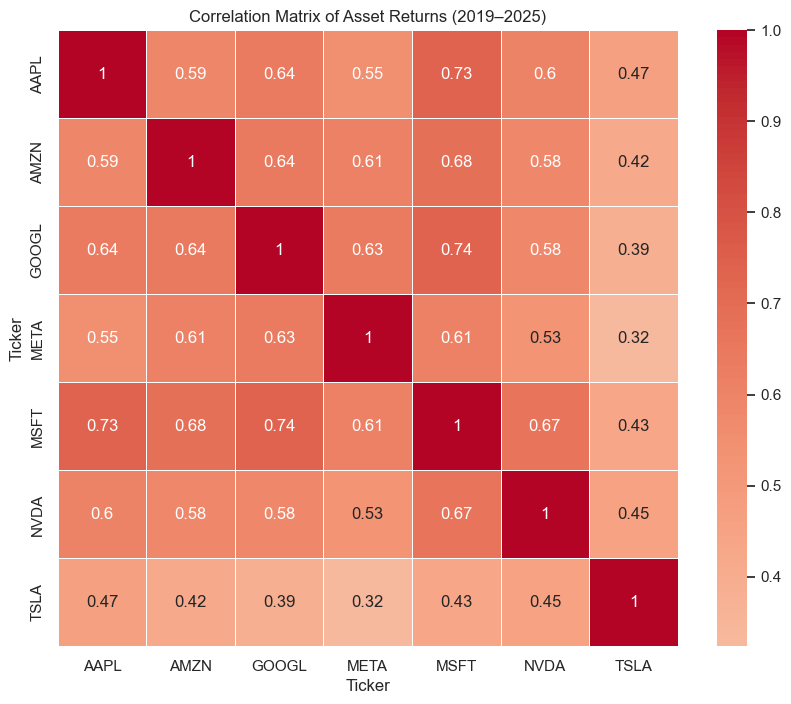

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation of daily returns
correlation_matrix = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Asset Returns (2019–2025)")
plt.show()



### Key Insights:
- **High correlations (0.6–0.75)**:
  - MSFT & GOOGL (0.74), AAPL & MSFT (0.73), AMZN & MSFT (0.68).
  - These big tech stocks move strongly together → less diversification benefit when combined.
- **Moderate correlations (~0.5–0.6)**:
  - NVDA with AAPL (0.60), NVDA with MSFT (0.67).
  - Shows partial diversification, but still influenced by broader tech trends.
- **Low correlations (<0.45)**:
  - TSLA with others (AAPL 0.47, AMZN 0.42, GOOGL 0.39, META 0.32).
  - TSLA behaves more independently, adding diversification despite its volatility.
- **Lowest pair**: META & TSLA (0.32) → these two are least related, so holding both spreads risk.

### Portfolio Implication:
- Combining **highly correlated tech giants** (AAPL, MSFT, GOOGL, AMZN) offers strong returns but limited diversification.
- Adding **TSLA** (and to some extent NVDA/META) introduces more diversification because their movements are less tied to the others.
- True diversification benefits come from **low-correlation assets**, which smooth out portfolio risk.

This analysis highlights why diversification is not just about owning multiple stocks, but owning stocks that don’t move identically.

## 📌 Portfolio Recommendations (Based on 2019–2025 Data)

After analyzing the past 6 years of Tesla, Amazon, Microsoft, NVIDIA, Google, Meta, and Apple, here are the key takeaways:

### 1. Steady & Reliable (Apple, Microsoft)
- They don’t move wildly, but they grow steadily year after year.
- Good for building a **stable foundation** in the portfolio.

### 2. Exciting but Wild (Tesla, NVIDIA)
- Huge profits during the AI and EV boom, but prices swing a lot.
- Good for growth, but risky if you put in too much.

### 3. Dependable Giants (Amazon, Google)
- Strong businesses that carry weight in the market.
- Add balance and stability to the portfolio.

### 4. Cyclical Risk (Meta)
- Crashed hard in 2022, bounced back in 2024.
- Can provide upside in good times, but adds risk.
---
### 🧩 Recommended Strategy
- Don’t put all your eggs in one basket.
- **Base** = Apple + Microsoft (steady growth).
- **Growth Boost** = Add Tesla + NVIDIA (big upside, higher risk).
- **Balance** = Amazon + Google (reliable giants).
- **Speculative** = Small dose of Meta (opportunistic play).
---
⚖️ The next step is to test **thousands of possible combinations** (Monte Carlo simulation) to find the “sweet spot” between making money and keeping risk under control.


## 🎲 Monte Carlo Portfolio Simulation

Having analyzed individual assets, the next step is to examine how they perform when combined into portfolios.
Instead of choosing arbitrary weights for each stock, we use a **Monte Carlo simulation** to generate thousands of random portfolios.

For each portfolio, we calculate:
- **Expected Return** → weighted average of annualized asset returns.
- **Volatility (Risk)** → portfolio standard deviation, accounting for correlations between assets.
- **Sharpe Ratio** → risk-adjusted performance, using a 4% risk-free rate.

### Why Monte Carlo?
- It allows us to explore a wide range of possible allocations.
- Portfolios that lie on the **efficient frontier** provide the highest expected return for a given level of risk.
- Suboptimal portfolios appear below the frontier (same risk, lower return).

The goal is to visualize the trade-off between **risk and return** and identify portfolios worth considering before moving to formal optimization.

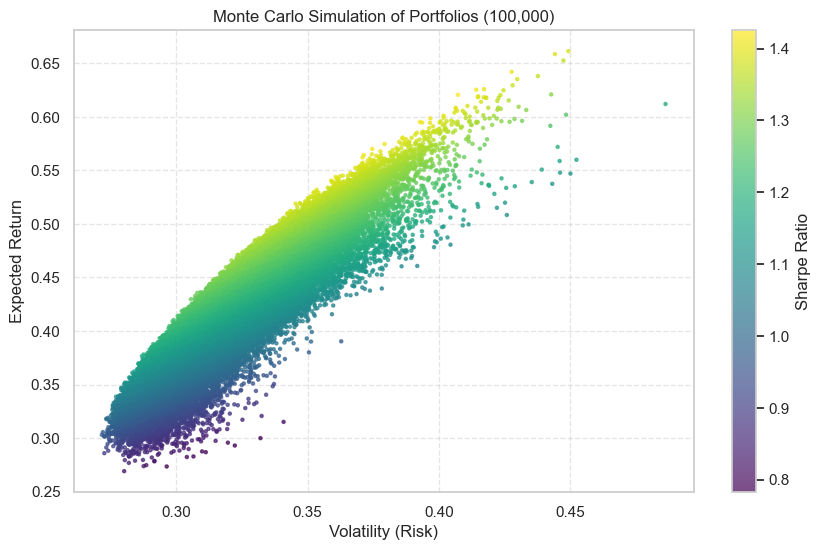

In [23]:
# Number of portfolios
n_portfolios = 100000
results = np.zeros((3, n_portfolios))  # [returns, volatility, sharpe]
weights_record = []

# Loop to generate random portfolios
for i in range(n_portfolios):
    # Random weights (sum to 1)
    weights = np.random.random(len(adj_close.columns))
    weights /= np.sum(weights)
    weights_record.append(weights)

    # Portfolio return
    portfolio_return = np.dot(weights, annual_returns)

    # Portfolio volatility (std dev with covariance matrix)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))

    # Sharpe ratio
    sharpe = (portfolio_return - risk_free_rate) / portfolio_volatility

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe

# Convert results to DataFrame
portfolios = pd.DataFrame(results.T, columns=["Return","Volatility","Sharpe"])
weights_df = pd.DataFrame(weights_record, columns=adj_close.columns)

# Scatterplot
plt.figure(figsize=(10,6))
plt.scatter(portfolios["Volatility"], portfolios["Return"],
            c=portfolios["Sharpe"], cmap="viridis", s=5, alpha=0.7)

plt.colorbar(label="Sharpe Ratio")
plt.title("Monte Carlo Simulation of Portfolios (100,000)")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## 🎲 Monte Carlo Portfolio Simulation — Results

The scatterplot above represents **100,000 random portfolios** created by assigning different weights to Tesla, Amazon, Microsoft, NVIDIA, Alphabet, Meta, and Apple.

### How to Read the Chart:
- **X-axis (Volatility)** → risk level of the portfolio.
- **Y-axis (Expected Return)** → average annualized return of the portfolio.
- **Color (Sharpe Ratio)** → risk-adjusted performance. Yellow/green = better.

### Key Insights:
1. **Efficient Frontier**:
   - The upper edge of the cloud shows the **best portfolios** (highest return for each risk level).
   - Any portfolio below this line is **suboptimal** (you could get more return for the same risk).

2. **Trade-off**:
   - Portfolios on the left are **low risk / lower return**.
   - Portfolios on the right are **high risk / higher return**.

3. **Sharpe Ratio Gradient**:
   - Portfolios with brighter (yellow-green) colors have a **better risk-return balance**.
   - These are strong candidates for inclusion in an optimal portfolio.

### Portfolio Implications:
- A rational investor would aim for portfolios **along the efficient frontier**.
- Among these, the **Maximum Sharpe Ratio portfolio** represents the most attractive balance between risk and return.
- The **Minimum Volatility portfolio** is suitable for risk-averse investors.


## 📈 Step 4: Mean-Variance Optimization (Efficient Frontier)

While the Monte Carlo simulation shows thousands of possible portfolios,
it does not guarantee finding the absolute optimal ones.

Using **Modern Portfolio Theory (MPT)**, we can formally optimize portfolios to identify:

1. **Maximum Sharpe Ratio Portfolio**
   - Best risk-adjusted return (balance between risk and reward).

2. **Minimum Volatility Portfolio**
   - Lowest overall portfolio risk.

3. **Efficient Frontier**
   - The curve showing the best possible return for each level of risk.
   - Portfolios lying below the frontier are suboptimal.

This helps investors align portfolio choices with their **risk tolerance**.


Maximum Sharpe Portfolio:
{'AAPL': np.float64(0.205), 'AMZN': np.float64(0.0), 'GOOGL': np.float64(0.0), 'META': np.float64(0.0), 'MSFT': np.float64(0.0), 'NVDA': np.float64(0.583), 'TSLA': np.float64(0.212)}
Return: 66.06%, Volatility: 42.76%, Sharpe: 1.45

Minimum Volatility Portfolio:
{'AAPL': np.float64(0.284), 'AMZN': np.float64(0.129), 'GOOGL': np.float64(0.234), 'META': np.float64(0.0), 'MSFT': np.float64(0.353), 'NVDA': np.float64(0.0), 'TSLA': np.float64(0.0)}
Return: 29.75%, Volatility: 26.95%, Sharpe: 0.96


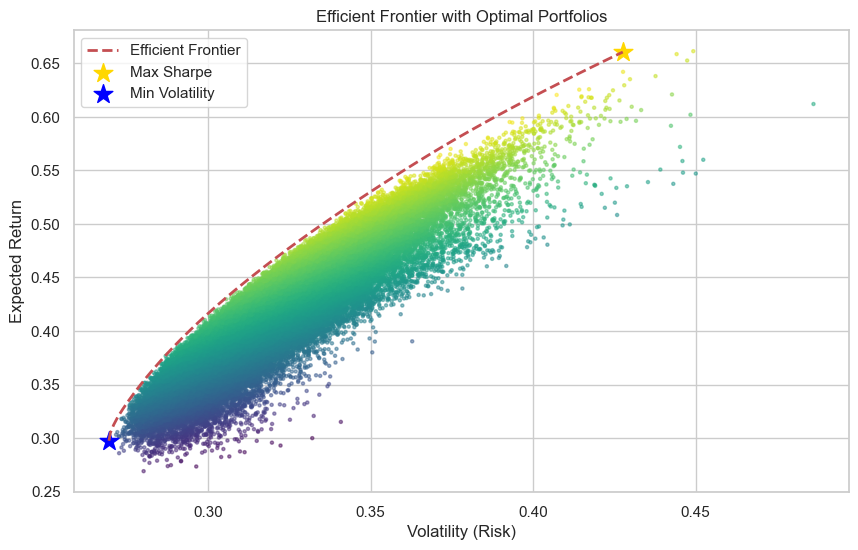

In [28]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Use annualized returns and covariance from earlier
mean_returns = annual_returns.values
cov_matrix = returns.cov().values * 252
tickers = annual_returns.index

# Number of assets
num_assets = len(tickers)

# Risk-free rate
rf = 0.04

# ---- Utility functions ----
def portfolio_performance(weights):
    """Calculate return, volatility, Sharpe ratio of portfolio"""
    weights = np.array(weights)
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (port_return - rf) / port_volatility
    return port_return, port_volatility, sharpe

def min_volatility(weights):
    return portfolio_performance(weights)[1]

def neg_sharpe(weights):
    return -portfolio_performance(weights)[2]

# Constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = tuple((0,1) for asset in range(num_assets))
initial_guess = num_assets * [1./num_assets,]

# ---- Optimize Maximum Sharpe Ratio Portfolio ----
opt_sharpe = minimize(neg_sharpe, initial_guess, method='SLSQP',
                      bounds=bounds, constraints=constraints)
weights_sharpe = opt_sharpe.x
ret_sharpe, vol_sharpe, sharpe_sharpe = portfolio_performance(weights_sharpe)

# ---- Optimize Minimum Volatility Portfolio ----
opt_minvol = minimize(min_volatility, initial_guess, method='SLSQP',
                      bounds=bounds, constraints=constraints)
weights_minvol = opt_minvol.x
ret_minvol, vol_minvol, sharpe_minvol = portfolio_performance(weights_minvol)

print("Maximum Sharpe Portfolio:")
print(dict(zip(tickers, weights_sharpe.round(3))))
print(f"Return: {ret_sharpe:.2%}, Volatility: {vol_sharpe:.2%}, Sharpe: {sharpe_sharpe:.2f}\n")

print("Minimum Volatility Portfolio:")
print(dict(zip(tickers, weights_minvol.round(3))))
print(f"Return: {ret_minvol:.2%}, Volatility: {vol_minvol:.2%}, Sharpe: {sharpe_minvol:.2f}")

# ---- Efficient Frontier Curve ----
target_returns = np.linspace(ret_minvol, ret_sharpe, 50)
frontier_volatility = []

for tr in target_returns:
    # Constraint: portfolio return must equal target return
    constraints_frontier = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'eq', 'fun': lambda w: np.dot(w, mean_returns) - tr}
    )
    result = minimize(min_volatility, initial_guess, method='SLSQP',
                      bounds=bounds, constraints=constraints_frontier)
    frontier_volatility.append(result.fun)

# ---- Plot Efficient Frontier ----
plt.figure(figsize=(10,6))
plt.scatter(portfolios["Volatility"], portfolios["Return"],
            c=portfolios["Sharpe"], cmap="viridis", s=5, alpha=0.5)
plt.plot(frontier_volatility, target_returns, 'r--', linewidth=2, label="Efficient Frontier")
plt.scatter(vol_sharpe, ret_sharpe, c='gold', marker='*', s=200, label='Max Sharpe')
plt.scatter(vol_minvol, ret_minvol, c='blue', marker='*', s=200, label='Min Volatility')
plt.title("Efficient Frontier with Optimal Portfolios")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.legend()
plt.show()


## 📈 Efficient Frontier — Interpretation

The chart above shows the **Efficient Frontier** (red dashed curve) along with
two optimized portfolios based on 2019–2025 data:

### Key Elements:
- **Efficient Frontier (red dashed curve)**
  - Represents the best possible risk-return combinations.
  - Portfolios below this curve are suboptimal (you could earn more return for the same risk).

- **Blue Star ⭐ (Minimum Volatility Portfolio)**
  - The safest portfolio (lowest risk).
  - Provides steady but relatively lower returns.
  - Suitable for risk-averse investors.

- **Gold Star ⭐ (Maximum Sharpe Portfolio)**
  - The best risk-adjusted portfolio.
  - Balances return and risk most efficiently.
  - Suitable for investors seeking optimal performance.

### Insights:
- As risk (volatility) increases, expected returns also increase.
- The frontier provides a **menu of optimal portfolios** depending on risk tolerance.
- In practice, investors choose a point along this frontier that matches their
  investment goals — conservative, balanced, or aggressive.


## 📉 Step 5: Downside Risk Analysis

While mean–variance optimization focuses on expected return and volatility,
it does not capture extreme losses. To address this, we analyze downside risk:

- **Value at Risk (VaR)** → Maximum expected loss at a given confidence level.
- **Conditional Value at Risk (CVaR)** → Average loss in worst-case scenarios.
- **Maximum Drawdown (MDD)** → Largest historical decline from peak to trough.

These metrics provide a fuller picture of portfolio risk,
helping investors understand potential downside beyond volatility.


In [29]:
import numpy as np
import pandas as pd

# ---- Step 1: Portfolio daily returns using Max Sharpe weights ----
weights_sharpe = weights_sharpe / np.sum(weights_sharpe)  # normalize
portfolio_returns = returns.dot(weights_sharpe)

# ---- Step 2: Value at Risk (VaR) ----
confidence_level = 0.95
VaR_95 = np.percentile(portfolio_returns, (1-confidence_level)*100)

# ---- Step 3: Conditional VaR (CVaR) ----
CVaR_95 = portfolio_returns[portfolio_returns <= VaR_95].mean()

# ---- Step 4: Maximum Drawdown ----
cumulative = (1 + portfolio_returns).cumprod()
rolling_max = cumulative.cummax()
drawdown = (cumulative - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# ---- Print Results ----
print("📉 Downside Risk Metrics (Max Sharpe Portfolio)")
print(f"95% Value at Risk (VaR): {VaR_95:.2%}")
print(f"95% Conditional VaR (CVaR): {CVaR_95:.2%}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")


📉 Downside Risk Metrics (Max Sharpe Portfolio)
95% Value at Risk (VaR): -4.20%
95% Conditional VaR (CVaR): -5.96%
Maximum Drawdown: -53.83%


## 📉 Downside Risk Interpretation (Max Sharpe Portfolio)

### Results:
- **95% Value at Risk (VaR): -4.20%**
  → On a typical day, there is only a 5% chance the portfolio will lose **more than 4.2%**.

- **95% Conditional VaR (CVaR): -5.96%**
  → If we do fall into the worst 5% of days, the **average loss is closer to 6%**.
  → This highlights how much damage can occur in extreme tail events.

- **Maximum Drawdown (MDD): -53.83%**
  → Historically, the portfolio lost **over half its value** from peak to trough.
  → This means an investor would need **more than 100% gain** to recover from that drawdown.

### Insights:
- The Max Sharpe portfolio, while efficient in risk-adjusted terms, is still **very vulnerable to crashes**.
- High exposure to volatile assets (e.g., NVIDIA, Tesla) contributes to severe downside risk.
- This emphasizes the importance of combining **mean–variance optimization with downside risk analysis** before making investment decisions.

### Investor Implication:
- A risk-tolerant investor might still choose this portfolio for its strong performance potential.
- A conservative investor would prefer the **Minimum Volatility portfolio**, trading off some returns for more stability.
